In [3]:
def process_file(file_opened):
    processed_lines = []
    for line in file_opened.read().splitlines():
        add_line = ""
        line = line[0:-17]
        for words in line.split(" "):
            temp = words.split(":")
            word = temp[0]
            times = temp[1]
            for k in range(0,int(times)):
                add_line+=word + " "
        processed_lines.append(add_line)
    return processed_lines

In [4]:
import numpy as np

positive_rev = process_file(open("positive.review",'r'))
kostya1 = np.full(len(positive_rev),"pos")
negative_rev = process_file(open("negative.review",'r'))
kostya2 = np.full(len(negative_rev),"neg")
X = positive_rev + negative_rev
y = list(kostya1) + list(kostya2)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.67, 
                                                    random_state=1)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(X_train,y_train)
labels = model.predict(X_test)
print((np.array(labels)==np.array(y_test)).sum(),'/',len(labels))

535 / 660


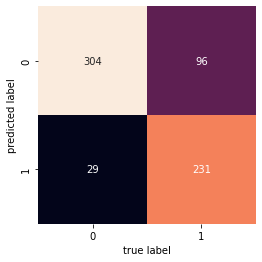

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');